In [2]:
import pandas as pd
import cv2
import numpy as np
import os
import shutil
import tensorflow as tf
import matplotlib.pyplot as plt
import pickle
import tensorflow as tf

In [7]:
p1 = "prep/Mask/"
p2 = "prep/Images/"
p3 = "data/0/"
p4 = "data/1/"
p5 = "data/mask/"

In [9]:
lis = os.listdir(p2)
for i in lis:
  im_mask = f"{str(i)[:-4]}_mask.tif"
  mask = f"{p1}{im_mask}"
  image = f"{p2}{str(i)}"
  tumor = is_tumor(mask)
  if tumor:
    shutil.copy(image, f"{p3}{i}")
  else:
    shutil.copy(image, f"{p4}{i}")
    shutil.copy(mask, f"{p5}{im_mask}")
    

In [12]:
dir1 = "dataset_classification/train/1/"
dir0 = "dataset_classification/train/0/"

sep1 = "prep/images/"
sep2 = "prep/mask/"


In [1]:
# lst = []
# prep_images = os.listdir("prep/images/")
# mask = "_mask"
# for i in prep_images:
#         k = i+mask
#         im = cv2.imread(k, cv2.IMREAD_GRAYSCALE)
#         arr = np.array(im)
#         if np.all(arr==0):
def is_tumor(path):
    arr = np.array(cv2.imread(path, cv2.IMREAD_GRAYSCALE))
    return np.all(arr==0)

In [14]:
lis = os.listdir(sep1)

for i in lis:
    image_name = f"{str(i)[:-4]}_mask.tif"
    mask = f"{sep2}{image_name}"
    image = f"{sep1}{str(i)}"
    
    tumor = is_tumor(mask)

    if tumor:
        shutil.copy(image, f"{dir0}{i}")
    else:
        shutil.copy(image, f"{dir1}{i}")

In [62]:
import tensorflow as tf

train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1.0/255)
train_generator = train_datagen.flow_from_directory("dataset_classification/train", 
                              batch_size=64, 
                              target_size=(250, 250), 
                              class_mode="categorical",
                              color_mode = "grayscale")

Found 7212 images belonging to 3 classes.


In [63]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, Input

model = Sequential()
model.add(Input(shape = (250, 250, 1)))
model.add(Conv2D(64, (5,5), padding = "same"))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Dropout(0.2))

model.add(Conv2D(64, (5,5), padding = "same"))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (5,5), padding = "same"))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64, activation="LeakyReLU"))

model.add(Dropout(0.2))

model.add(Dense(64, activation="LeakyReLU"))

model.add(Dense(3, activation="softmax"))
#fitongenerator

In [67]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=[tf.keras.metrics.Recall(),tf.keras.metrics.Precision(),"accuracy"])

In [68]:
# cw = n/(i*numsamples)  n = total number of images,    i = 3,     numsamples = num of samples in one class    7212    7668    4119     9849

In [69]:
model.fit_generator(train_generator, epochs=13, class_weight = {0:0.9405, 1:1.7509, 2:0.7322})

Epoch 1/13


C:\Users\gupta\AppData\Local\Temp\ipykernel_4456\1632027661.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(train_generator, epochs=13, class_weight = {0:0.9405, 1:1.7509, 2:0.7322})


113/113 [==============================] - 747s 7s/step - loss: 0.4536 - recall: 0.7786 - precision: 0.8315 - accuracy: 0.8099
Epoch 2/13
113/113 [==============================] - 730s 6s/step - loss: 0.3088 - recall: 0.8672 - precision: 0.8716 - accuracy: 0.8694
Epoch 3/13
113/113 [==============================] - 731s 6s/step - loss: 0.2720 - recall: 0.8856 - precision: 0.8875 - accuracy: 0.8866
Epoch 4/13
113/113 [==============================] - 736s 7s/step - loss: 0.2591 - recall: 0.8896 - precision: 0.8914 - accuracy: 0.8903
Epoch 5/13
113/113 [==============================] - 767s 7s/step - loss: 0.2312 - recall: 0.9035 - precision: 0.9046 - accuracy: 0.9042
Epoch 6/13
113/113 [==============================] - 761s 7s/step - loss: 0.2046 - recall: 0.9167 - precision: 0.9177 - accuracy: 0.9172
Epoch 7/13
113/113 [==============================] - 807s 7s/step - loss: 0.1832 - recall: 0.9279 - precision: 0.9285 - accuracy: 0.9280
Epoch 8/13
113/113 [=========================

In [70]:
model.save("braintestfinal2blah.keras")

In [71]:
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1.0/255)
test_generator = test_datagen.flow_from_directory("dataset_classification/validation",
                              batch_size=64,
                              target_size=(250, 250),
                              class_mode="categorical",
                              color_mode = "grayscale"
                              )
model = tf.keras.models.load_model("braintestfinal2blah.keras")

Found 32 images belonging to 3 classes.


In [72]:
model.evaluate(test_generator)

1/1 [==============================] - 1s 916ms/step - loss: 0.1240 - recall: 0.9375 - precision: 0.9375 - accuracy: 0.9375


[0.12404029816389084, 0.9375, 0.9375, 0.9375]

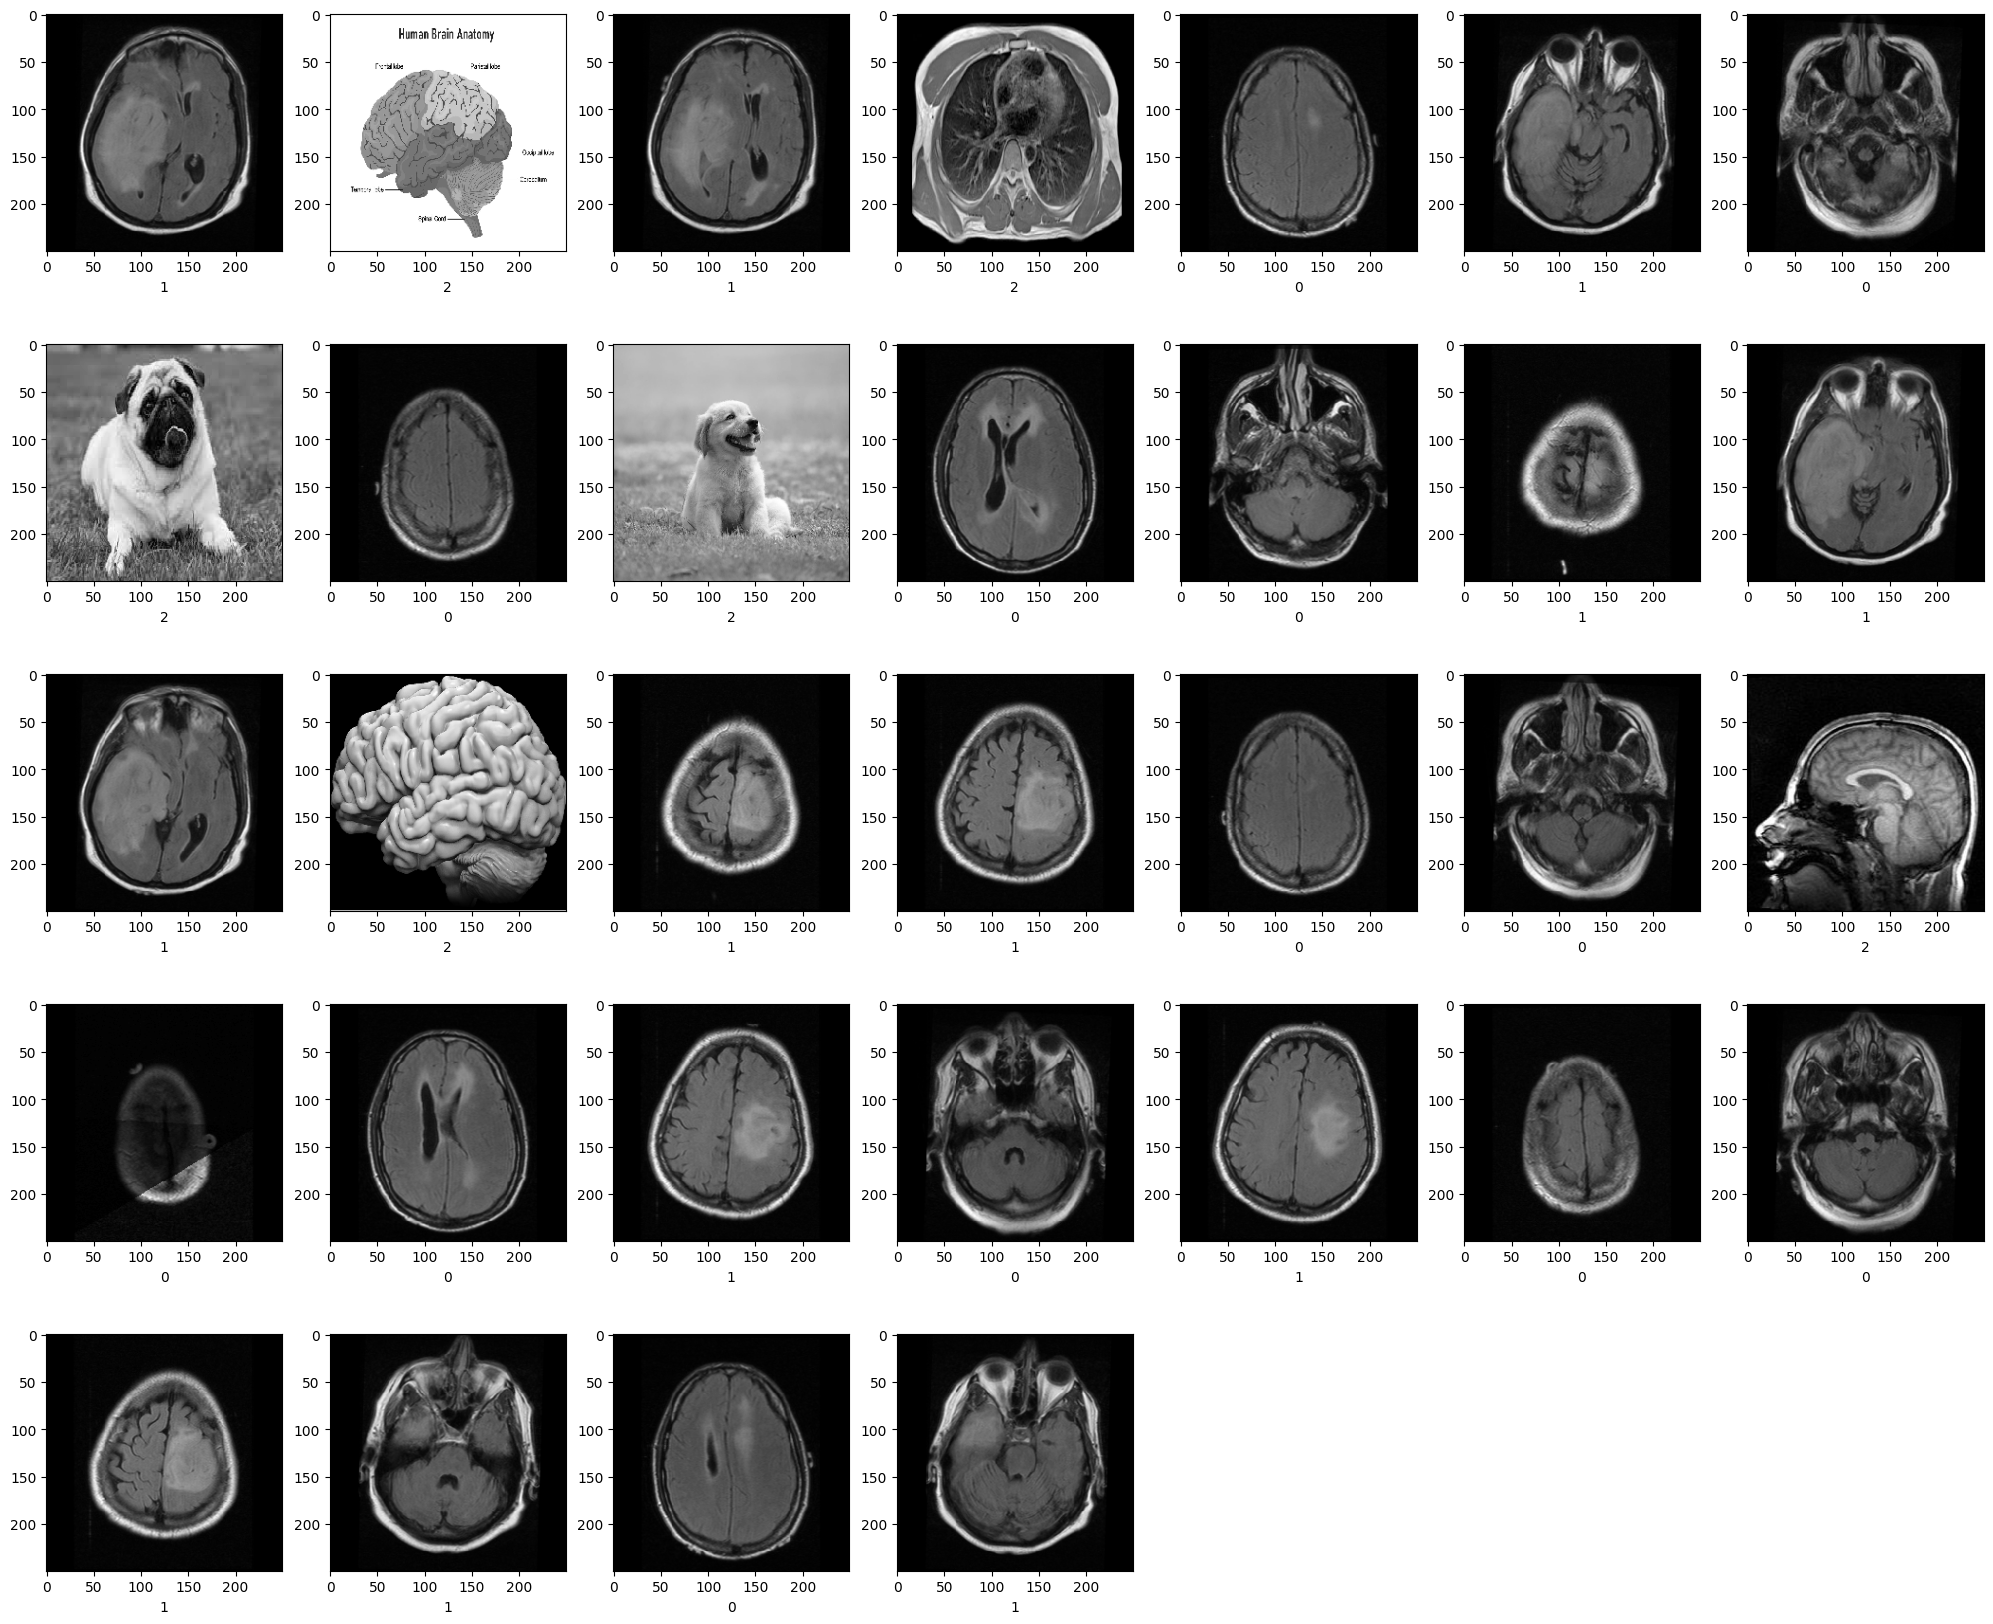

In [73]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize = (25,25))
img, label = test_generator.next()
label = np.argmax(label, axis=1)
for j in range(32):     
    plt.subplot(6,7,j+1)
    plt.imshow(img[j], cmap="gray")
    # if label[j]==0.0:
    #     plt.xlabel("No Tumor Detected")
    # else:
    #     plt.xlabel("Tumor Detected")
    plt.xlabel(label[j])
plt.show()

In [74]:
from tensorflow.keras.models import load_model
model2 = load_model("braintestfinal2blah.keras")

In [75]:
model2.evaluate(test_generator)

1/1 [==============================] - 1s 762ms/step - loss: 0.1240 - recall: 0.9375 - precision: 0.9375 - accuracy: 0.9375


[0.12404031306505203, 0.9375, 0.9375, 0.9375]

In [76]:
label

array([1, 2, 1, 2, 0, 1, 0, 2, 0, 2, 0, 0, 1, 1, 1, 2, 1, 1, 0, 0, 2, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 1], dtype=int64)

In [77]:
y_pred

array([0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0], dtype=int64)

1/1 [==============================] - 2s 2s/step


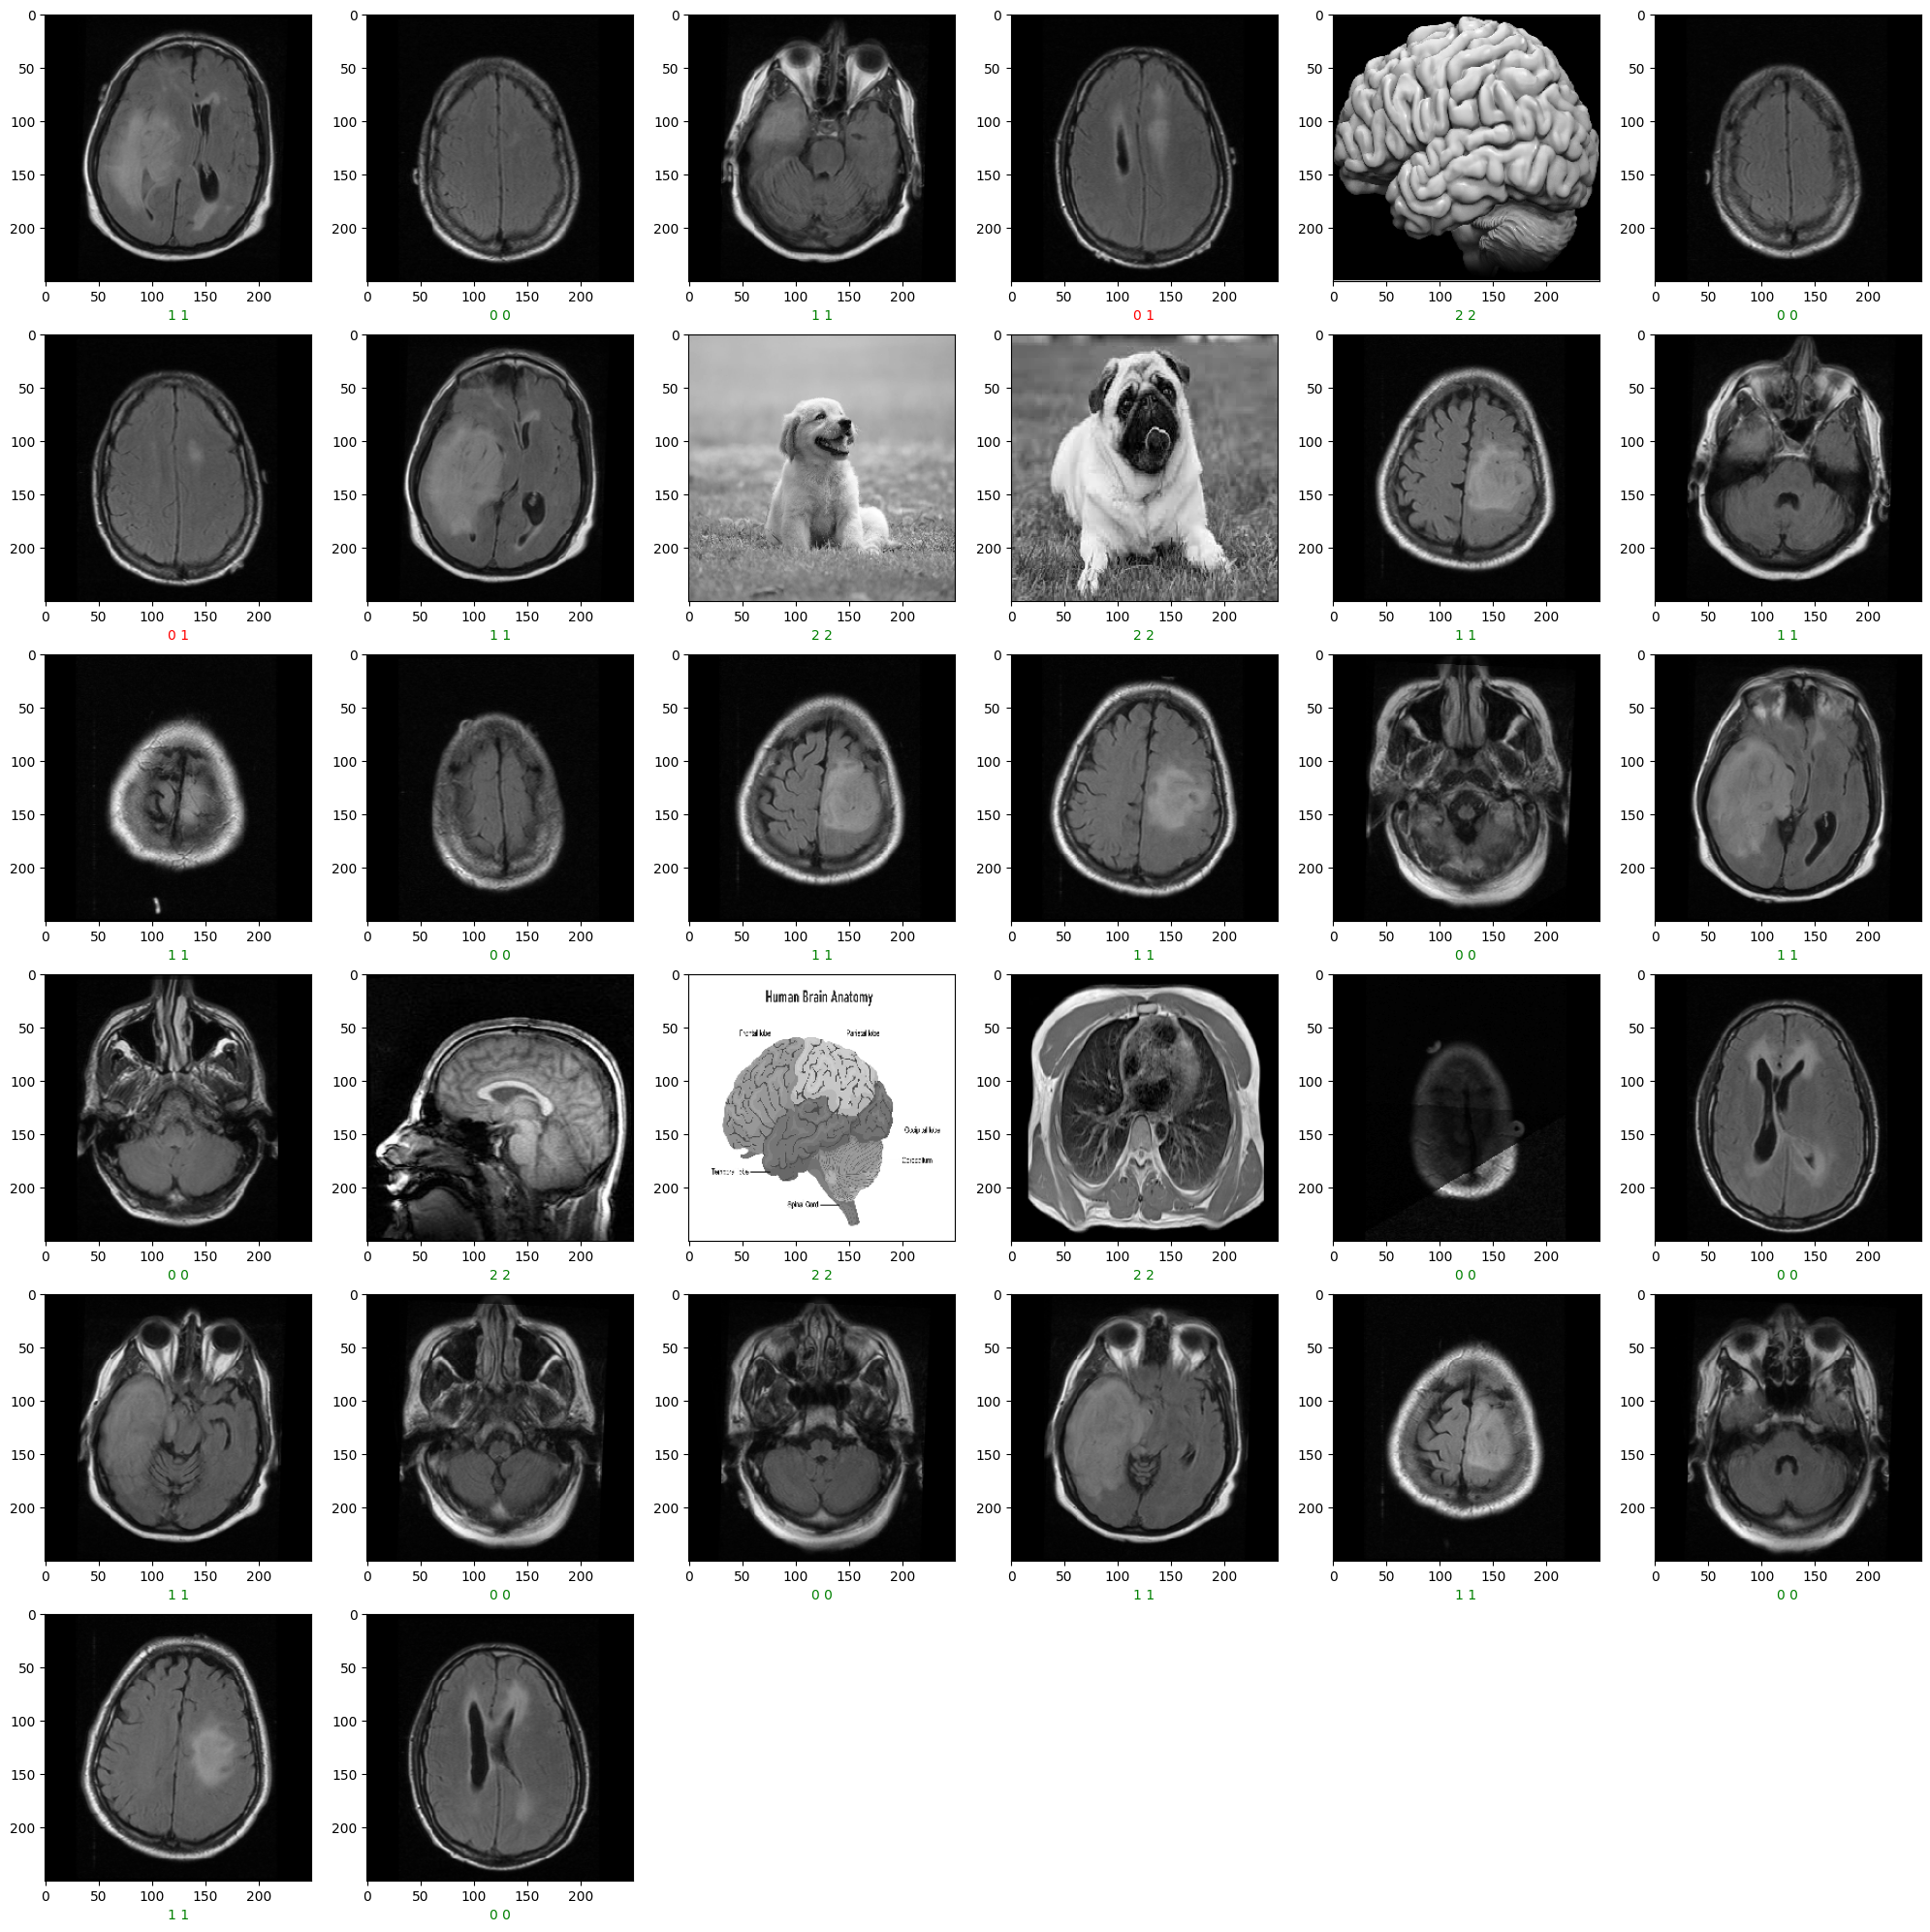

In [78]:
plt.figure(figsize = (25,25))
img, label = test_generator.next()
y_pred = model.predict(img)
y_pred = np.argmax(y_pred, axis= 1)
label = np.argmax(label, axis= 1)
for j in range(32):
    color = "green"
    plt.subplot(6,6,j+1)
    plt.imshow(img[j], cmap="gray")
    if label[j]!=y_pred[j]:
        color = "red"
    # if label[j]==0.0:
    #     plt.xlabel("No Tumor Detected", color = color)
    # else:
    #     plt.xlabel("Tumor Detected", color = color)
    plt.xlabel(f"{label[j]} {y_pred[j]}", color = color)
plt.show()

In [79]:
with open("modelblah2.pickle", "wb") as file:
    pickle.dump(model,file)

In [80]:
with open("modelblah2.pickle", "rb") as file:
    model3 = pickle.load(file)

In [52]:
label[-1]

1.0

In [53]:
y_pred[-1]

array([1.], dtype=float32)

In [54]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 250, 250, 64)      1664      
                                                                 
 activation_9 (Activation)   (None, 250, 250, 64)      0         
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 125, 125, 64)      0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 125, 125, 64)      102464    
                                                                 
 activation_10 (Activation)  (None, 125, 125, 64)      0         
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 62, 62, 64)        0         
 ng2D)                                                

In [7]:
import numpy as np
arr = np.argmax(y_pred)


TypeError: argmax() missing 1 required positional argument: 'a'

In [9]:
arrw = np.array(["a","b","c","d"])
arr2 = np.array([1,2,3,1,2])
arrw[arr2]

array(['b', 'c', 'd', 'b', 'c'], dtype='<U1')

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


(250, 250)

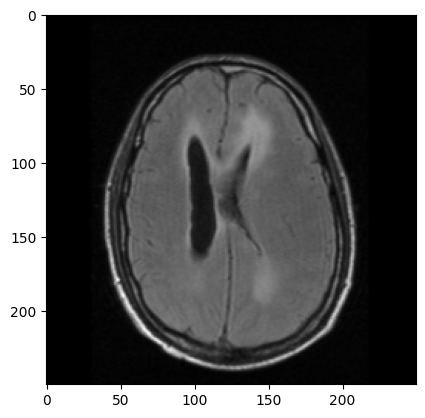

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
img = cv2.imread("test/TCGA_CS_5393_19990606_14.tif",cv2.IMREAD_GRAYSCALE)
img = np.array(cv2.resize(img,(250,250)))
print(img)
plt.imshow(img,cmap= "gray")
img.shape

In [45]:
img = img[np.newaxis,:,:,np.newaxis]
img.shape

(1, 250, 250, 1)

In [46]:
model = tf.keras.models.load_model("braintestfinalblah.keras")

In [47]:
y_pred = model.predict(img)

1/1 [==============================] - 0s 77ms/step


In [48]:
print(y_pred)

[[0.98556256 0.01443743 0.        ]]


In [57]:
test_generator.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 2, 2, 2, 2])